# Apply PCA and Clustering to Wholesale Customer Data

### Read in wholesale_customers_data.csv from the datasets folder and store in a dataframe.

In [49]:
import pandas as pd

df = pd.read_csv("./wholesale_customers_data.csv")
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


### Store the Channel column in a separate variable

In [50]:
df_channel = df['Channel']
channel = np.array(df_channel)
# channel is target

### drop the Channel and Region columns from the dataframe

In [51]:
df = df.drop(columns=['Channel', 'Region'])

# df is features

In [52]:
df.head


<bound method NDFrame.head of      Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0    12669   9656     7561     214              2674        1338
1     7057   9810     9568    1762              3293        1776
2     6353   8808     7684    2405              3516        7844
3    13265   1196     4221    6404               507        1788
4    22615   5410     7198    3915              1777        5185
..     ...    ...      ...     ...               ...         ...
435  29703  12051    16027   13135               182        2204
436  39228   1431      764    4510                93        2346
437  14531  15488    30243     437             14841        1867
438  10290   1981     2232    1038               168        2125
439   2787   1698     2510      65               477          52

[440 rows x 6 columns]>

### Scale the data

In [53]:
from sklearn import preprocessing


min_max_scaler = preprocessing.MinMaxScaler()

scaled_df = min_max_scaler.fit_transform(df)


### fit a k-means object to data

In [54]:
from sklearn.cluster import KMeans
import numpy as np

X = scaled_df
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

### visualize the data and the clustering

In [55]:
import matplotlib.pyplot as plt

print(X.shape)

(440, 6)


In [81]:
milk = X[:, 0]
milk


array([1.12940044e-01, 6.28990263e-02, 5.66216072e-02, 1.18254449e-01,
       2.01626422e-01, 8.39069801e-02, 1.08098227e-01, 6.75535899e-02,
       5.31440596e-02, 5.35274815e-02, 2.99871598e-02, 1.17193352e-01,
       2.82760281e-01, 1.89160752e-01, 2.19798837e-01, 9.13970824e-02,
       9.06837393e-03, 5.23682990e-02, 1.65834433e-01, 6.93458644e-02,
       1.56427221e-01, 4.96130114e-02, 2.78854728e-01, 2.35135714e-01,
       2.01911759e-01, 1.44113136e-01, 8.82316225e-02, 1.27269323e-01,
       3.66480009e-02, 3.84179834e-01, 1.67742626e-01, 2.32639013e-02,
       1.92861219e-01, 2.65060456e-01, 1.33662660e-02, 6.10800014e-03,
       2.67075650e-01, 1.35223098e-01, 4.09102258e-02, 5.00731177e-01,
       2.14199094e-01, 1.70961586e-01, 9.67204052e-02, 5.59082641e-03,
       8.61985947e-02, 4.61711310e-02, 2.76420444e-02, 3.96467168e-01,
       1.02685737e-01, 4.42629383e-02, 5.58725969e-02, 2.98177408e-02,
       3.63073795e-01, 4.35139280e-03, 2.43660163e-01, 4.69112245e-02,
      

In [82]:
grocery = X[:, 2]
grocery

array([0.08146416, 0.10309667, 0.08278992, 0.04546385, 0.07755155,
       0.05521843, 0.07514794, 0.10156612, 0.06670834, 0.20347715,
       0.13980836, 0.04871897, 0.12669088, 0.16145165, 0.13029091,
       0.04115244, 0.13061427, 0.0315811 , 0.10882007, 0.10197571,
       0.04957048, 0.02163252, 0.04813693, 0.23730019, 0.1486252 ,
       0.08183063, 0.03080505, 0.0327883 , 0.27974606, 0.02808886,
       0.11968484, 0.03373681, 0.03107451, 0.0789312 , 0.02434871,
       0.11951238, 0.05847354, 0.13445143, 0.18006618, 0.0096899 ,
       0.05124115, 0.06416461, 0.1612253 , 0.25863091, 0.11282969,
       0.23204027, 0.23661037, 0.59894155, 0.11710877, 0.31169363,
       0.02130916, 0.07537428, 0.06330233, 0.12426571, 0.02095347,
       0.05391422, 0.28954374, 0.11300214, 0.01773069, 0.08662707,
       0.08462227, 0.6423467 , 0.07050239, 0.16999903, 0.0349979 ,
       0.4939263 , 0.07991205, 0.14506828, 0.04300635, 0.01390431,
       0.03448053, 0.22676957, 0.02864934, 0.09388103, 0.10553

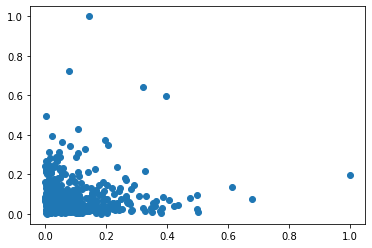

In [58]:
# overall view scatter

plt.scatter(milk, grocery)

In [59]:
df.corr()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


In [60]:
# PCA - Principle component analysis

In [61]:
from sklearn.decomposition import PCA

In [62]:
pca = PCA(n_components=2)

In [63]:
pca.fit(scaled_df)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [64]:
pca_2d = pca.transform(scaled_df)

In [65]:
pca.explained_variance_ratio_

array([0.51948323, 0.26407007])

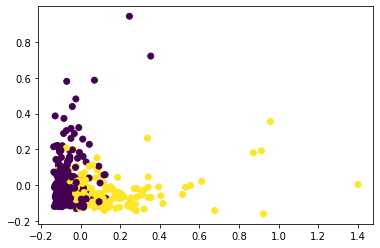

In [66]:
# PCA scatter view

plt.scatter(pca_2d[:,0],pca_2d[:, 1], c=channel)

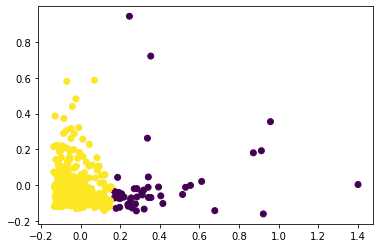

In [68]:
# kmeans scatter view

kmeans = KMeans(n_clusters=2, random_state=111)
kmeans.fit(scaled_df)
plt.figure('K-means with 2 clusters')
plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=kmeans.labels_)
plt.show()

In [78]:
chanl_prd = kmeans.predict(scaled_df)+1

In [79]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

In [80]:
confusion_matrix(channel, chanl_prd)
# true and predicted targets

array([[  2, 296],
       [ 45,  97]])

In [ ]:
# flip/reverse = transpose

# kmeans.fit pass pca_2d

# machine learning vid-youtube & take notes